In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
predicted_test = pd.read_pickle('./output_file/predicted_testing.pickle')

In [98]:
predicted_test.shape[0]

331

In [41]:
i=0
(predicted_test['close_original'][i] - predicted_test['close_original'][i+1])/predicted_test['close_original'][i]

0.0009344130995816311

In [8]:
def buy_plan(predicted_test, input_money=100, lever=1, handle_fee = 0.0005, trade_percent_cutoff=0.0, print_history=False):
    ############### args ##########
    # input = predictied dataframe with 'close_original' and 'pred_close' columns
    # input_money = trading money
    # lever = 槓桿
    # handle_fee = trading fee
    # trade_percent_cutoff = if expected income is lower that cutoff, skip this trade
    # print_history = print out each trading detail
    ############## output ##########
    # df = with 'total_earn_money', 'day_earn_percent', 'total_day_earn_percent' columns
    # win_rate = trading win percent
    ###############################
    
    # input 128 datas
    start_index = 128
    input_df = predicted_test[128:].reset_index(drop=True).copy()
    total_earn_money = [input_money]
    total_day_earn_percent = [0]
    day = []
    win_count = 0
    trade = ''
    for i in range(len(input_df)-1):
        earn_persent          = (input_df['close_original'][i] - input_df['close_original'][i+1])/input_df['close_original'][i]
        expected_earn_percent = (input_df['close_original'][i] - input_df['pred_close'][i+1])    /input_df['close_original'][i]
        charge_handle_fee     = handle_fee*input_money*lever
        if abs(expected_earn_percent*100) < trade_percent_cutoff:
            total_earn_money.append(input_money)
            continue
        # open emtpy
        if input_df['close_original'][i] > input_df['pred_close'][i+1]:
            day_earn_percent = (earn_persent*-1*lever) + 1
            if trade == 'Sell':
                earn_money = day_earn_percent*input_money
                charge_handle_fee = 0
            else:
                earn_money = day_earn_percent*input_money - charge_handle_fee
                trade = 'Sell'
        else:
            # open more
            day_earn_percent = earn_persent*lever+1
            if trade == 'Buy':
                earn_money = day_earn_percent*input_money
                charge_handle_fee = 0
            else:
                earn_money = day_earn_percent*input_money - charge_handle_fee
                trade = 'Buy'
        if print_history == True:
            print(f'Trading {i+1}')
            print(f'Trade_{trade}----:', f'{(day_earn_percent-1)*100}%')
            print('handle_fee---:', charge_handle_fee)
            print('input_money--:',input_money)
            print('output_money-:',earn_money)
            print('--------------------------')
        total_earn_money.append(earn_money)
        #total_day_earn_percent.append((1-day_earn_percent)*100)
        day.append(i)
        if day_earn_percent > 1:
            win_count += 1
        input_money = earn_money
        if earn_money < 0:
            print('You Are broken XD')
            return input_df
    input_df['total_earn_money']       = total_earn_money
    input_df['day_earn_percent']       = (input_df['total_earn_money'].shift(0) - input_df['total_earn_money'].shift(1))/input_df['total_earn_money'].shift(0)*100
    input_df['total_day_earn_percent'] = input_df['total_earn_money'].apply(lambda x: (x- total_earn_money[0])/total_earn_money[0]*100)
    win_rate = (win_count/len(day))
    input_df = input_df.fillna(0)
    print('trading win rate:', win_rate)
    return input_df

In [9]:
input_df= buy_plan(predicted_test, input_money=10000, lever=2, trade_percent_cutoff=0.0, print_history=True)

Trading 1
Trade_Sell----: -0.3625509183088127%
handle_fee---: 10.0
input_money--: 10000
output_money-: 9953.74490816912
--------------------------
Trading 2
Trade_Sell----: -0.5771085853290225%
handle_fee---: 0
input_money--: 9953.74490816912
output_money-: 9896.300991742324
--------------------------
Trading 3
Trade_Sell----: -3.268248773880933%
handle_fee---: 0
input_money--: 9896.300991742324
output_money-: 9572.865255920138
--------------------------
Trading 4
Trade_Buy----: 0.449847556412708%
handle_fee---: 9.572865255920139
input_money--: 9572.865255920138
output_money-: 9606.355691096654
--------------------------
Trading 5
Trade_Sell----: 0.5948630914880626%
handle_fee---: 9.606355691096654
input_money--: 9606.355691096654
output_money-: 9653.893999848955
--------------------------
Trading 6
Trade_Sell----: 0.3153509240465979%
handle_fee---: 0
input_money--: 9653.893999848955
output_money-: 9684.337643783958
--------------------------
Trading 7
Trade_Sell----: -2.16985076409808

In [162]:
input_df['total_day_earn_percent']

0        0.000000
1       -1.156377
2       -2.582465
3      -10.542083
4       -9.759668
          ...    
198    209.481061
199    208.851073
200    209.205872
201    214.726454
202    216.280805
Name: total_day_earn_percent, Length: 203, dtype: float64

In [105]:
input_df['total_earn_money'][83]

13180.160576893453

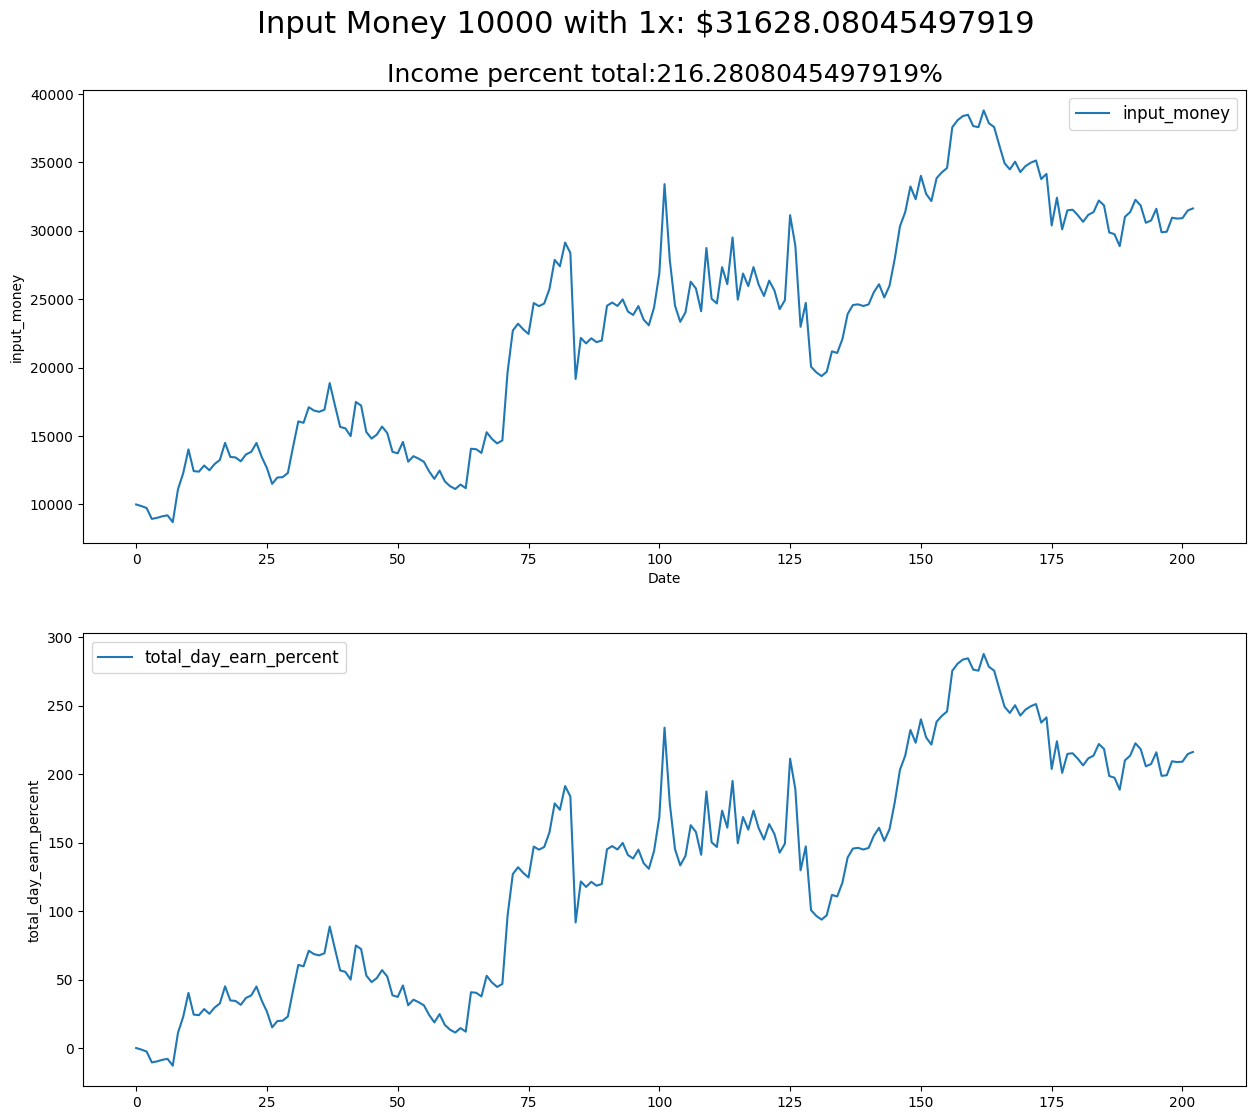

In [6]:
#'''Display results'''
fig = plt.figure(figsize=(15,20))
st = fig.suptitle(f"Input Money 10000 with 1x: ${list(input_df['total_earn_money'])[-1]}", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(input_df['total_earn_money'], label='input_money')
ax11.set_title(f"Income percent total:{list(input_df['total_day_earn_percent'])[-1]}%", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('input_money')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(input_df['total_day_earn_percent'], label='total_day_earn_percent')
ax21.set_xlabel('')
ax21.set_ylabel('total_day_earn_percent')
ax21.legend(loc="best", fontsize=12)


In [96]:
list(input_df['total_day_earn_percent'])[-1]

96.6012966806352